<div style="display: flex; flex-direction: column; align-items: center; padding-top: 5px;">
    <div style="display: flex; gap: 0 50px;">
        <img style="box-sizing: border-box; border-radius: 100%; outline: 10px solid lightblue; border: 3px solid black;" src="https://cdn.discordapp.com/attachments/998995040514883694/1005571542001909840/Sujal.jpg" width="200px" alt="Profile_Pic" />
        <div style="display: flex; flex-direction: column; justify-content: center; line-height: 0;">
            <h1>Sujal Kulshrestha</h1>
            <h3>2115500144 - 2T - (51)</h3>
            <h3>GLA University, Mathura (281406)</h3>
        </div>
        <img height="140px" style="padding-top: 20px; padding-right: 50px;" src="https://cdn.discordapp.com/attachments/998995040514883694/1018942042178588752/GLA.png" alt="GLA Logo" />
    </div>
    <h3 style="text-align: center; text-decoration: underline;">Workshop - 1</h3>
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
default = pd.read_csv("/content/drive/MyDrive/ML-Lab/Datasets/Default_Fin.csv")
default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
default.shape

(10000, 5)

In [ ]:
default.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


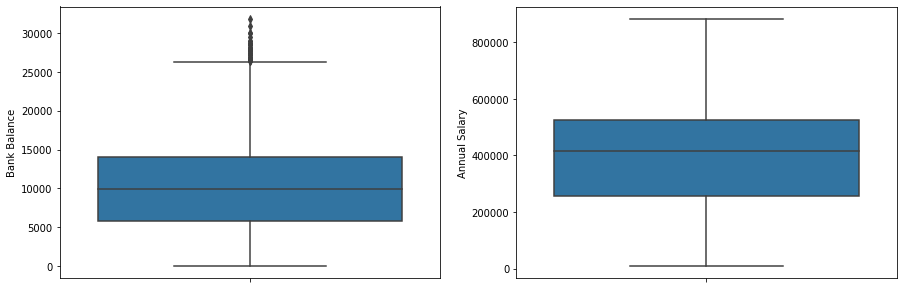

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=default["Bank Balance"])
plt.subplot(1,2,2)
sns.boxplot(y=default["Annual Salary"])
plt.show()

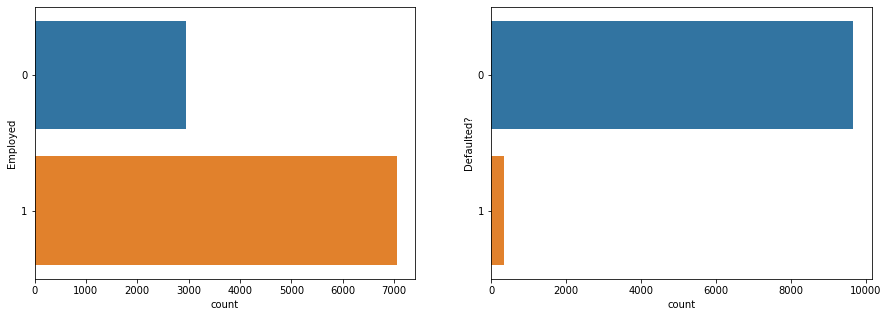

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=default["Employed"])
plt.subplot(1,2,2)
sns.countplot(y=default["Defaulted?"])
plt.show()

In [ ]:
default["Employed"].value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [ ]:
default["Defaulted?"].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [ ]:
default["Employed"].value_counts(normalize=True)

1    0.7056
0    0.2944
Name: Employed, dtype: float64

In [ ]:
default["Defaulted?"].value_counts(normalize=True)

0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

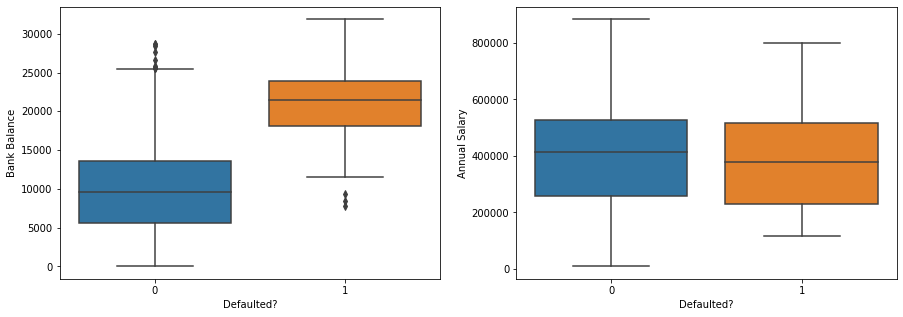

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(default["Defaulted?"],default["Bank Balance"])
plt.subplot(1,2,2)
sns.boxplot(default["Defaulted?"],default["Annual Salary"])
plt.show()

In [ ]:
pd.crosstab(default["Employed"],default["Defaulted?"],normalize="index").round(2)

Defaulted?,0,1
Employed,,
0,0.96,0.04
1,0.97,0.03


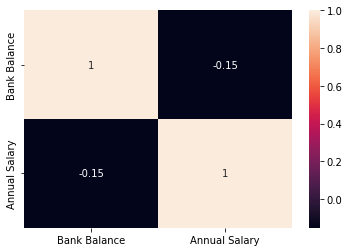

In [ ]:
sns.heatmap(default[["Bank Balance","Annual Salary"]].corr(),annot=True)

In [ ]:
Q1,Q3 = default["Bank Balance"].quantile([.25,.75])
IQR = Q3-Q1
LL = Q1-1.5*(IQR)
UL = Q3+1.5*(IQR)

In [ ]:
UL

26317.964999999997

In [ ]:
df=default[default["Bank Balance"] > UL]

In [ ]:
df["Defaulted?"].count()

31

In [ ]:
df["Defaulted?"].value_counts(normalize=True)

1    0.83871
0    0.16129
Name: Defaulted?, dtype: float64

In [ ]:
df["Defaulted?"].value_counts()

1    26
0     5
Name: Defaulted?, dtype: int64

In [ ]:
default["Bank Balance"] = np.where(default["Bank Balance"]>UL,UL,default["Bank Balance"])

In [ ]:
default.head(20)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


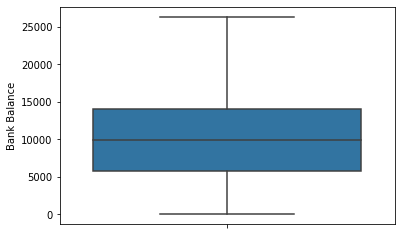

In [ ]:
sns.boxplot(y=default["Bank Balance"])
plt.show()

In [ ]:
default = pd.get_dummies(default,drop_first=True)
default

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = default.drop('Defaulted?',axis=1).astype("int")
y = default["Defaulted?"].astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7000, 4)
(3000, 4)


In [ ]:
print(y_train.value_counts(normalize=True).round(2))
print("")
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: Defaulted?, dtype: float64

0    0.97
1    0.03
Name: Defaulted?, dtype: float64


In [ ]:
print(y_train.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: Defaulted?, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_test,y_test)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[2905,    6],
       [  89,    0]])